In [86]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 
import numpy as np 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

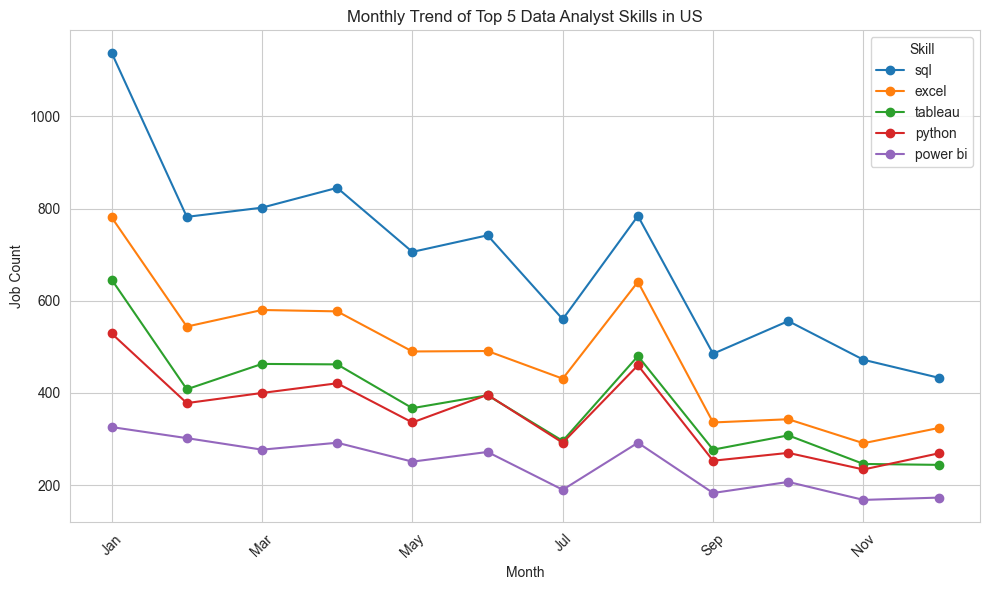

In [91]:
#Skill count per month for data analysts
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# ...existing code...
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month
# Explode job_skills column
df_DA_US_explode = df_DA_US.explode('job_skills')
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# Get total count for each skill and select top 5
total_skill_counts = df_DA_US_pivot.sum(axis=0)
top5_skills = total_skill_counts.sort_values(ascending=False).head(5).index

# Filter pivot table for top 5 skills
pivot_top5 = df_DA_US_pivot[top5_skills]

# Map month numbers to names for x-axis
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
pivot_top5.index = pivot_top5.index.map(month_names)

# Plot line chart
plt.figure(figsize=(10,6))
pivot_top5.plot(marker='o', ax=plt.gca())
plt.title('Monthly Trend of Top 5 Data Analyst Skills in US')
plt.xlabel('Month')
plt.ylabel('Job Count')
plt.xticks(rotation=45)
plt.legend(title='Skill')
plt.tight_layout()
plt.show()

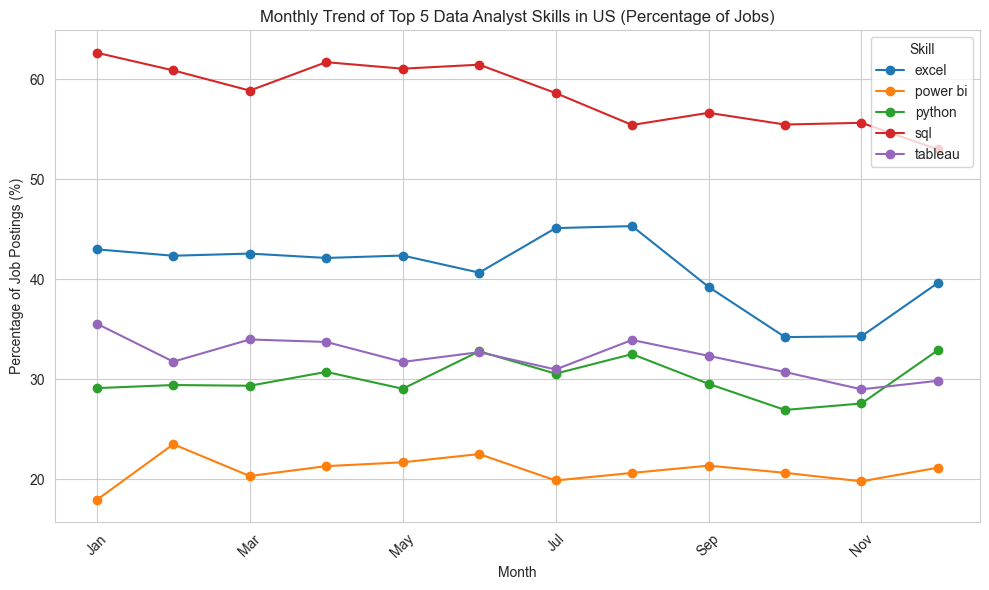

In [121]:
# Filter Data Analyst jobs in US
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

# Explode job_skills column
df_DA_US['job_idx'] = df_DA_US.index  # unique job id
df_DA_US_explode = df_DA_US.explode('job_skills')

# Get top 5 skills overall
top5_skills = (
    df_DA_US_explode['job_skills']
    .value_counts()
    .head(5)
    .index
)

# For each month and skill, count unique jobs requiring that skill
skill_month_job = (
    df_DA_US_explode[df_DA_US_explode['job_skills'].isin(top5_skills)]
    .drop_duplicates(subset=['job_idx', 'job_skills']) # Ensure unique job-skill pairs
    .groupby(['job_posted_month_no', 'job_skills'])
    .size()
    .unstack(fill_value=0)
)#or (df_DA_US_explode[df_DA_US_explode['job_skills'].isin(top5_skills)]
#.drop_duplicates(subset=['job_idx', 'job_skills']).pivot_table(index='job_posted_month_no', 
#columns='job_skills',
#aggfunc='size', fill_value=0))

# For each month, count total unique jobs
month_total_jobs = df_DA_US.groupby('job_posted_month_no').size()

# Calculate percentage for each skill in each month
skill_month_pct = skill_month_job.div(month_total_jobs, axis=0) * 100

# Map month numbers to names for x-axis
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
skill_month_pct.index = skill_month_pct.index.map(month_names)

# Plot line chart
plt.figure(figsize=(10,6))
skill_month_pct.plot(marker='o', ax=plt.gca())
plt.title('Monthly Trend of Top 5 Data Analyst Skills in US (Percentage of Jobs)')
plt.xlabel('Month')
plt.ylabel('Percentage of Job Postings (%)')
plt.xticks(rotation=45)
plt.legend(title='Skill')
plt.tight_layout()
plt.show()

In [100]:
df_DA_US['job_idx'] = df_DA_US.index 
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no,job_idx
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11,36
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,"[sql, python, unix, excel, jira]","{'analyst_tools': ['excel'], 'async': ['jira']...",1,155
332,Data Analyst,Data Analyst,"Mossville, IL",via Trabajo.org,Full-time,False,"Illinois, United States",2023-04-27 13:01:50,False,False,United States,None,NaN,NaN,Aditi Consulting,"[python, matlab, c++, sql, tableau]","{'analyst_tools': ['tableau'], 'programming': ...",4,332
385,Data Analyst,Data Analyst,"Waukesha, WI",via Trabajo.org,Full-time,False,"Illinois, United States",2023-02-11 13:04:12,False,True,United States,None,NaN,NaN,Uline,"[vba, sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",2,385
476,Data Analyst,Data Analyst,"St Peters, MO",via Trabajo.org,Full-time,False,"Illinois, United States",2023-01-15 13:02:07,True,True,United States,None,NaN,NaN,"BizzyCar, Inc.",[tableau],{'analyst_tools': ['tableau']},1,476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784841,Data Analyst,Data Analyst,California,via Trabajo.org,Full-time,False,"California, United States",2023-01-17 06:17:12,False,False,United States,None,NaN,NaN,Blue Shield of CA,"[sas, sas, excel, powerpoint, tableau]","{'analyst_tools': ['sas', 'excel', 'powerpoint...",1,784841
784929,Data Analyst,Data Analyst,"Pleasant Hill, CA",via Trabajo.org,Full-time,False,"California, United States",2023-05-12 06:01:41,False,True,United States,None,NaN,NaN,Special Olympics of Northern California,"[sql, azure, sheets, spreadsheet, excel, share...","{'analyst_tools': ['sheets', 'spreadsheet', 'e...",5,784929
785078,Data Analyst,Data Analyst,"Columbia, SC",via Trabajo.org,Full-time,False,Georgia,2023-03-24 06:54:14,True,False,United States,None,NaN,NaN,"Hornet Staffing, Inc.","[sql, visual basic, sas, sas, db2]","{'analyst_tools': ['sas'], 'databases': ['db2'...",3,785078
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,"[sql, python, r, azure, snowflake, databricks,...","{'analyst_tools': ['tableau', 'excel'], 'cloud...",1,785539


In [ ]:
df_DA_US.explode('job_skills')


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no,job_idx
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11,36
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,sql,"{'analyst_tools': ['excel'], 'async': ['jira']...",1,155
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,python,"{'analyst_tools': ['excel'], 'async': ['jira']...",1,155
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,unix,"{'analyst_tools': ['excel'], 'async': ['jira']...",1,155
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,excel,"{'analyst_tools': ['excel'], 'async': ['jira']...",1,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,databricks,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1,785539
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,tableau,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1,785539
785539,Data Analyst,Data Analyst,"Fairfax Station, VA",via Monster,Full-time,False,"New York, United States",2023-01-06 05:59:59,False,True,United States,None,NaN,NaN,Guidehouse,excel,"{'analyst_tools': ['tableau', 'excel'], 'cloud...",1,785539
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc",sql,"{'analyst_tools': ['excel'], 'programming': ['...",7,785685


In [107]:
df_DA_US_explode[df_DA_US_explode['job_skills'].isin(top5_skills)].drop_duplicates(subset=['job_idx', 'job_skills']).groupby(['job_posted_month_no', 'job_skills']).size().unstack(fill_value=0)

job_skills,excel,power bi,python,sql,tableau
job_posted_month_no,,,,,
1,781,326,529,1138,646
2,544,302,378,782,408
3,580,277,400,802,463
4,577,292,421,845,462
5,490,251,336,706,367
6,491,272,396,742,395
7,431,190,292,560,296
8,641,292,460,784,480
9,336,183,253,485,277


In [109]:
df_DA_US_explode[df_DA_US_explode['job_skills'].isin(top5_skills)].drop_duplicates(subset=['job_idx', 'job_skills']).pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

job_skills,excel,power bi,python,sql,tableau
job_posted_month_no,,,,,
1,781,326,529,1138,646
2,544,302,378,782,408
3,580,277,400,802,463
4,577,292,421,845,462
5,490,251,336,706,367
6,491,272,396,742,395
7,431,190,292,560,296
8,641,292,460,784,480
9,336,183,253,485,277


In [119]:
skill_month_pct= skill_month_job.div(month_total_jobs, axis=0) * 100
skill_month_pct

job_skills,excel,power bi,python,sql,tableau
job_posted_month_no,,,,,
1,43.006608,17.951542,29.129956,62.665198,35.572687
2,42.367601,23.520249,29.439252,60.903427,31.775701
3,42.584435,20.337739,29.368576,58.883994,33.994126
4,42.147553,21.329438,30.752374,61.723886,33.747261
5,42.387543,21.712803,29.065744,61.072664,31.747405
6,40.679370,22.535211,32.808616,61.474731,32.725766
7,45.130890,19.895288,30.575916,58.638743,30.994764
8,45.332390,20.650636,32.531825,55.445545,33.946252
9,39.252336,21.378505,29.556075,56.658879,32.359813
